In [1]:
import seaborn as sns

%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
sns.set()

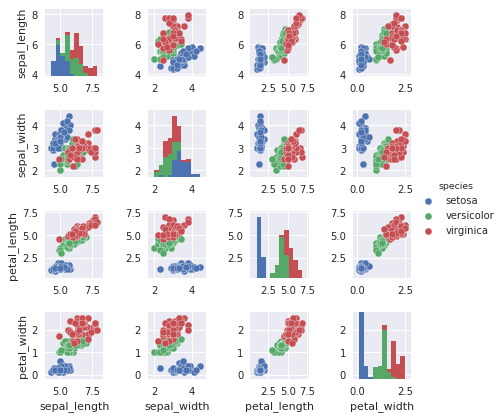

In [5]:
sns.pairplot(iris, hue='species', size=1.5);

In [6]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
X_iris.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y_iris = iris.species
print(y_iris.shape)
y_iris.head()

(150,)


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Simple linear regression

In [8]:
import matplotlib.pyplot as plt
import numpy as np

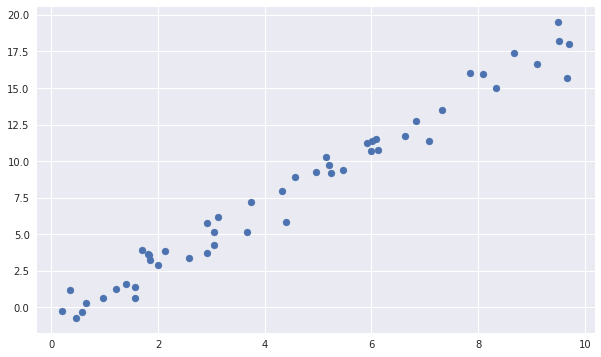

In [9]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.figure(figsize=(10, 6))
plt.scatter(x, y);

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
x.shape[0]

50

In [13]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.coef_

array([ 1.9776566])

In [18]:
model.intercept_

-0.90331072553111635

In [19]:
xfit = np.linspace(-1, 11)

In [20]:
Xfit = xfit[:, None]
yfit = model.predict(Xfit)

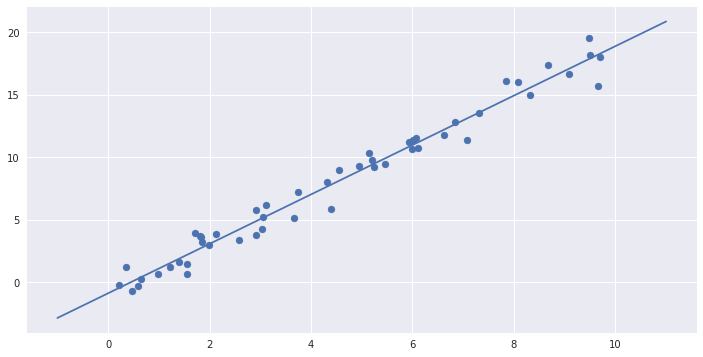

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y)

plt.plot(xfit, yfit);

In [22]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                                random_state=1, test_size=None)

/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [24]:
# choose model class
from sklearn.naive_bayes import GaussianNB

# instantiate model
model = GaussianNB()

# fit model to data
model.fit(X=Xtrain, y=ytrain)

# predict on new data
y_model = model.predict(Xtest)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

### Unsupervised learning example: Iris dimensionality

In [26]:
# 1. Choose the model class
from sklearn.decomposition import PCA

# 2. Instantiate the model with hyperparameters
model = PCA(n_components=2)

# 3. Fit to data. Notice y is not specified!
model.fit(X_iris)

# 4. Transform the data to two dimensions
X_2D = model.transform(X_iris)

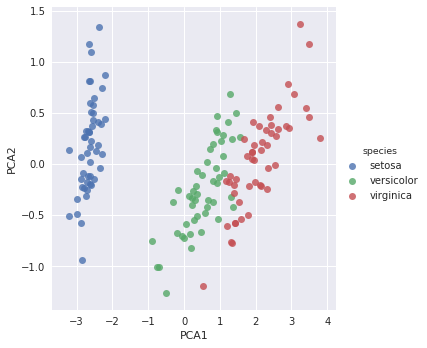

In [27]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]


sns.lmplot('PCA1', 'PCA2', hue='species', data=iris,
          fit_reg=False);

### Unsupervised learning: Iris clustering

In [28]:
# GMM deprecated, use GaussianMixture instead. Lot of warnings here

# choose the model class
from sklearn.mixture import GMM

# instantiate the model with hyperparameters
model = GMM(n_components=3, covariance_type='full')

# fit the data. Notice y is not specified!
model.fit(X_iris)

# Determine cluster labels
y_gmm = model.predict(X_iris)

/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77:

In [29]:
# choose the model class
from sklearn.mixture import GaussianMixture as GM

# instantiate the model with hyperparameters
model = GM(n_components=3, covariance_type='full')

# fit the data. Notice y is not specified!
model.fit(X_iris)

# Determine cluster labels
y_gmm = model.predict(X_iris)

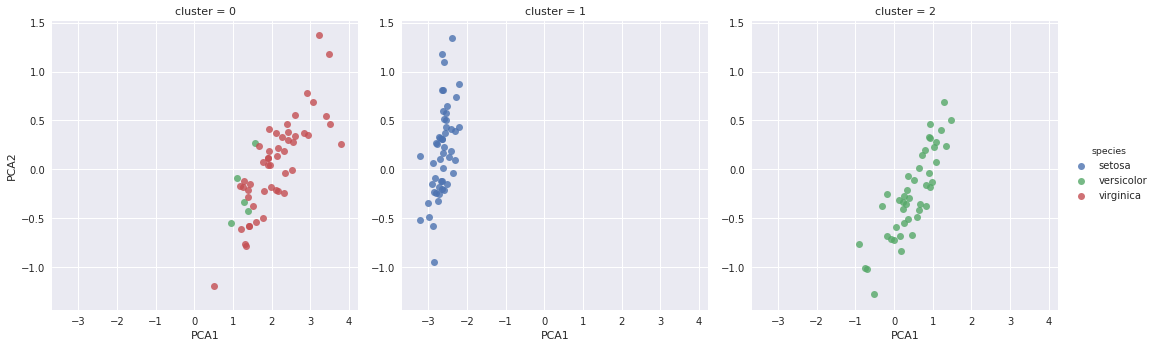

In [30]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

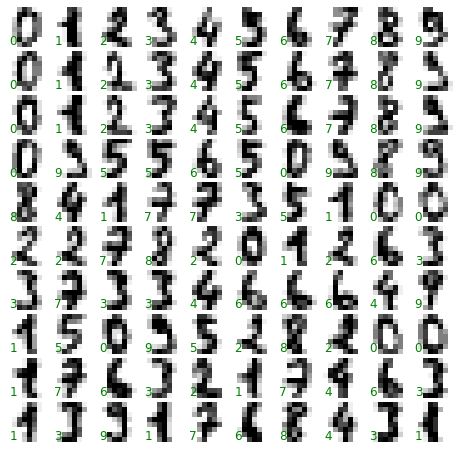

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [33]:
X = digits.data
X.shape

(1797, 64)

In [34]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [35]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

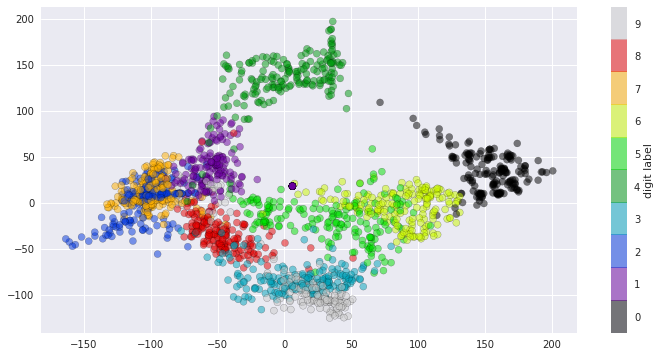

In [36]:
plt.figure(figsize=(12, 6))

# The spectral and spectral_r colormap was deprecated in version 2.0. 
# Use nipy_spectral and nipy_spectral_r instead

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

Text(47.04,0.5,'true value')

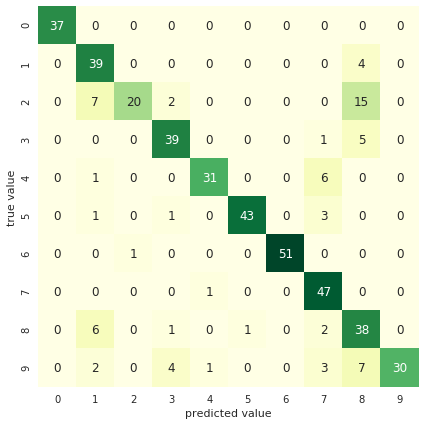

In [49]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

plt.figure(figsize=(7, 7))
sns.heatmap(mat, square=True, annot=True, cbar=False, 
            cmap=plt.cm.get_cmap('YlGn'))
plt.xlabel('predicted value')
plt.ylabel('true value')

In [68]:
np.reshape(Xtest, (-1, 8, 8)).shape

(450, 8, 8)

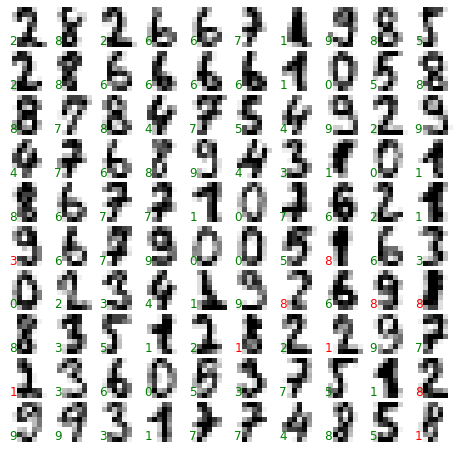

In [69]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes, 
            color='green' if (ytest[i] ==  y_model[i]) else 'red')